In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  

In [2]:
df = pd.read_csv('csv/gameandgrade.csv')

In [3]:
df.head()

,Sex,School Code,Playing Years,Playing Often,Playing Hours,Playing Games,Parent Revenue,Father Education,Mother Education,Grade
0,0,1,1,2,1,1,4,4,5,77.50
1,1,1,1,3,1,1,1,3,3,83.00
2,0,1,0,0,0,0,1,3,3,80.00
3,0,1,3,5,1,1,2,2,3,45.00
4,1,1,1,1,2,1,1,3,4,85.00


In [4]:
missing_values = df.isnull().sum().sum()  # Total missing values in the DataFrame

if missing_values > 0:
    print(f"There are {missing_values} missing values. Cleaning the data...")
    df = df.dropna()  # or df.fillna(value) to replace missing values
else:
    print("No missing values found. Data is clean.")

No missing values found. Data is clean.


In [5]:
duplicates_count = df.duplicated().sum()  # Count duplicates
print(f"Number of duplicate rows: {duplicates_count}")

if duplicates_count > 0:
    df = df.drop_duplicates(keep="first")  # Drop duplicates, keep first
    print(f"Dropped {duplicates_count} duplicate rows.")
else:
    print("No duplicates found.")

Number of duplicate rows: 16
Dropped 16 duplicate rows.


In [6]:
print(df.duplicated().sum())

0


In [7]:
print(df.dtypes)  # Show data types of each column

Sex                  int64
School Code          int64
Playing Years        int64
Playing Often        int64
Playing Hours        int64
Playing Games        int64
Parent Revenue       int64
Father Education     int64
Mother Education     int64
Grade               object
dtype: object


In [8]:

df["Grade"] = df["Grade"].str.replace("..", ".", regex=False)  # Fix invalid ".."
df["Grade"] = pd.to_numeric(df["Grade"], errors="coerce")  # Convert to float, set errors to NaN


In [9]:
df["Grade"] = df["Grade"].astype(float)


In [10]:
X = df.drop(columns=["Grade"])
Y = df["Grade"]

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [12]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [13]:
Y_pred = model.predict(X_test)

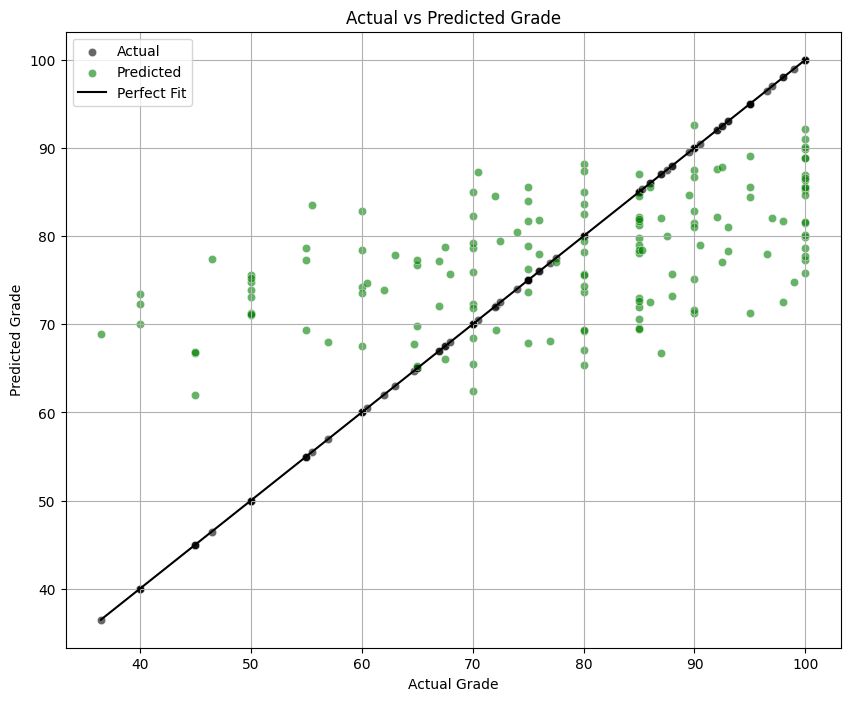

In [14]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=Y_test.values.flatten(), y=Y_test.values.flatten(), color="black", label="Actual", alpha=0.6)
sns.scatterplot(x=Y_test.values.flatten(), y=Y_pred.flatten(), color="green", label="Predicted", alpha=0.6)

plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color="black", linestyle="-", label="Perfect Fit")

plt.xlabel("Actual Grade")
plt.ylabel("Predicted Grade")
plt.title("Actual vs Predicted Grade")
plt.legend()
plt.grid()
plt.show()
